# Importing the libraries we will require for performing EDA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading data
data =pd.read_csv("D:/Programming language/CAR DETAILS FROM CAR DEKHO.csv")
data

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


In [3]:
# printing the head of data frame
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [4]:
# To check bottom five rows
data.tail()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner
4339,Renault KWID RXT,2016,225000,40000,Petrol,Individual,Manual,First Owner


In [5]:
# Here is the row count and type of each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [6]:
# To check the dimension
data.shape

(4340, 8)

In [7]:
# To check columns
data.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

In [8]:
# To check columns types
data.dtypes

name             object
year              int64
selling_price     int64
km_driven         int64
fuel             object
seller_type      object
transmission     object
owner            object
dtype: object

In [9]:
# To check no. of unique value in each column
data.nunique()

name             1491
year               27
selling_price     445
km_driven         770
fuel                5
seller_type         3
transmission        2
owner               5
dtype: int64

In [10]:
# checking for missing values in our dataset
data.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [11]:
(data.isnull().sum()/(len(data)))*100

name             0.0
year             0.0
selling_price    0.0
km_driven        0.0
fuel             0.0
seller_type      0.0
transmission     0.0
owner            0.0
dtype: float64

In [12]:
# To check duplicates
data.duplicated().sum()

763

In [13]:
data.drop_duplicates(inplace=True)

In [14]:
data.duplicated().sum()

0

# Descriptive Statistics

In [15]:
data.describe()

,year,selling_price,km_driven
count,3577.000000,3.577000e+03,3577.000000
mean,2012.962538,4.739125e+05,69250.545709
std,4.251759,5.093018e+05,47579.940016
min,1992.000000,2.000000e+04,1.000000
25%,2010.000000,2.000000e+05,36000.000000
50%,2013.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


# Relationship Analysis

In [16]:
data.corr()

,year,selling_price,km_driven
year,1.00000,0.424260,-0.417490
selling_price,0.42426,1.000000,-0.187359
km_driven,-0.41749,-0.187359,1.000000


<AxesSubplot:>

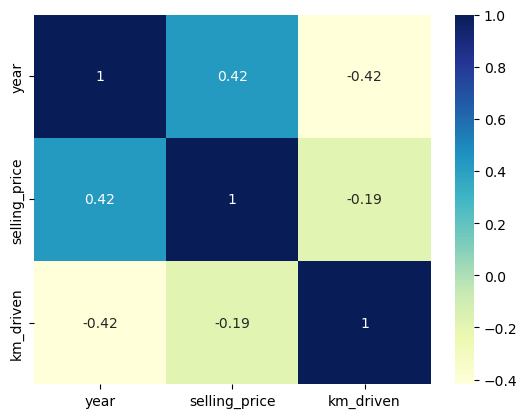

In [17]:
sns.heatmap(data.corr(),cmap='YlGnBu',annot= True)

In [18]:
data.name.value_counts()

Maruti Swift Dzire VDI               54
Maruti Alto 800 LXI                  48
Maruti Alto LXi                      42
Maruti Alto LX                       30
Maruti Swift VDI BSIV                28
                                     ..
Toyota Innova 2.5 E 8 STR             1
Nissan Micra XL CVT                   1
Mahindra Scorpio VLX AT 2WD BSIII     1
Toyota Corolla AE                     1
Hyundai i20 Magna 1.4 CRDi            1
Name: name, Length: 1491, dtype: int64

In [19]:
# This line of code is the separation process to identify the make of the car models in the column named "name". The column named "name" is then saved as a new variable "name_2".
data["name_2"] = data.name.apply(lambda x : ' '.join(x.split(' ')[:1]))
data['name_2']

0        Maruti
1        Maruti
2       Hyundai
3        Datsun
4         Honda
         ...   
4335    Hyundai
4336    Hyundai
4337     Maruti
4338    Hyundai
4339    Renault
Name: name_2, Length: 3577, dtype: object

In [20]:
data.name_2.value_counts()

Maruti           1072
Hyundai           637
Mahindra          328
Tata              308
Ford              220
Honda             216
Toyota            170
Chevrolet         151
Renault           110
Volkswagen         93
Nissan             52
Skoda              49
Fiat               32
Audi               31
Datsun             29
BMW                25
Mercedes-Benz      21
Jaguar              5
Mitsubishi          5
Land                5
Volvo               4
Jeep                3
Ambassador          3
MG                  2
OpelCorsa           2
Daewoo              1
Force               1
Isuzu               1
Kia                 1
Name: name_2, dtype: int64

# Data Visualization

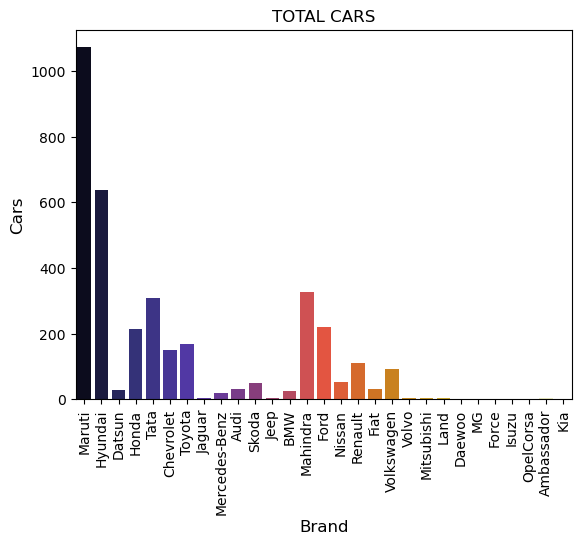

In [21]:
sns.countplot(data=data,x='name_2',palette='CMRmap')
plt.xticks(rotation=90)
plt.xlabel("Brand",fontsize=12,color='k')
plt.ylabel("Cars",fontsize =12,color='k')
plt.title('TOTAL CARS',color ='black')
plt.show()

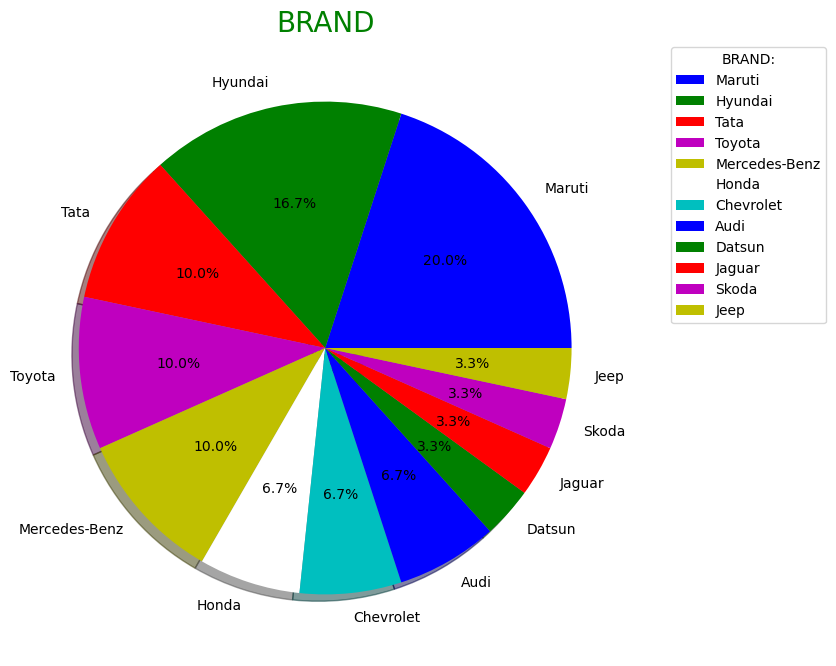

In [22]:
labels = data['name_2'][:30].value_counts().index
sizes = data['name_2'][:30].value_counts()
colors = ['b','g','r','m','y','w','c']
plt.figure(figsize = (8,8))
plt.pie(sizes,labels = labels, rotatelabels = False, autopct = '%1.1f%%',colors = colors,shadow = True,startangle = 0)
plt.title('BRAND',color = 'g',fontsize = 20)
plt.legend(bbox_to_anchor=(1.05,1),title = 'BRAND:')
plt.show()

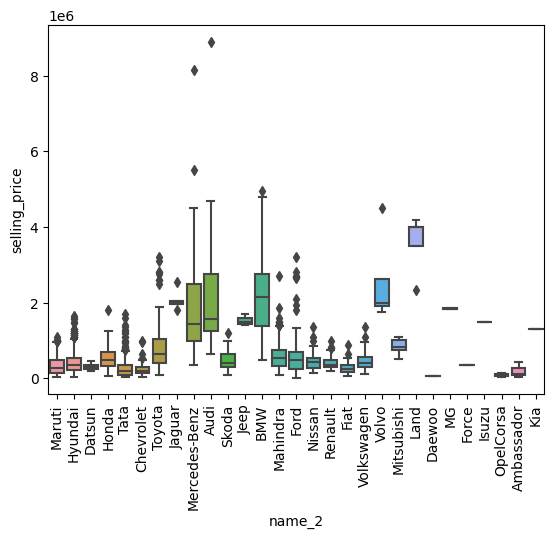

In [23]:
sns.boxplot(x = 'name_2',y='selling_price',data = data)
plt.xticks(rotation = 90)
plt.show()

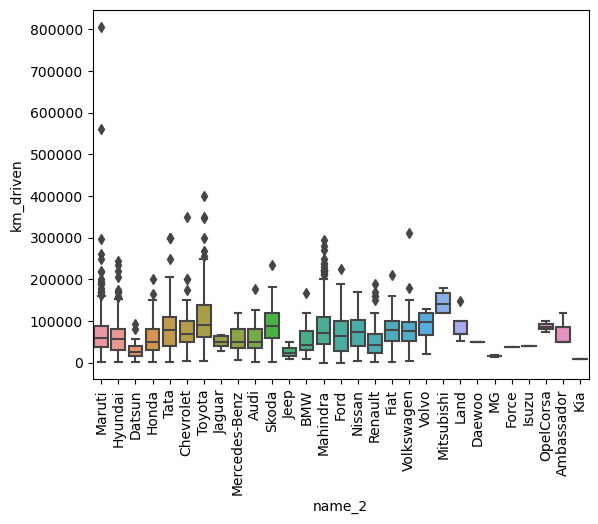

In [24]:
sns.boxplot(x = 'name_2',y='km_driven',data = data)
plt.xticks(rotation = 90)
plt.show()

In [25]:
data.year.value_counts()

2017    346
2012    338
2015    332
2014    321
2013    298
2018    295
2016    283
2011    247
2010    210
2009    169
2019    162
2008    129
2007    117
2006     93
2005     61
2020     45
2004     38
2003     22
2002     18
2001     16
2000     12
1998      9
1999      9
1997      3
1996      2
1995      1
1992      1
Name: year, dtype: int64

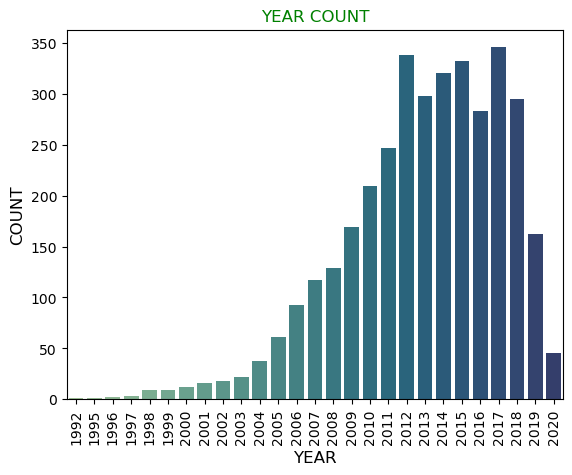

In [26]:
sns.countplot(data = data , x= 'year', palette ='crest')
plt.xticks(rotation = 90)
plt.xlabel("YEAR",fontsize = 12,color = 'k')
plt.ylabel("COUNT",fontsize = 12, color = 'k')
plt.title("YEAR COUNT", color = 'g')
plt.show()
        

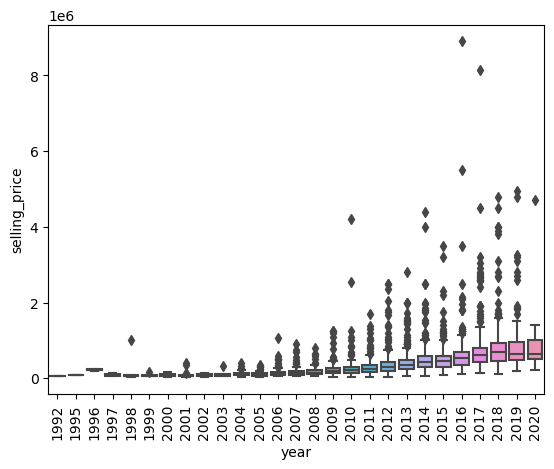

In [27]:
sns.boxplot(x = 'year',y = 'selling_price', data = data)
plt.xticks(rotation=90)
plt.show()

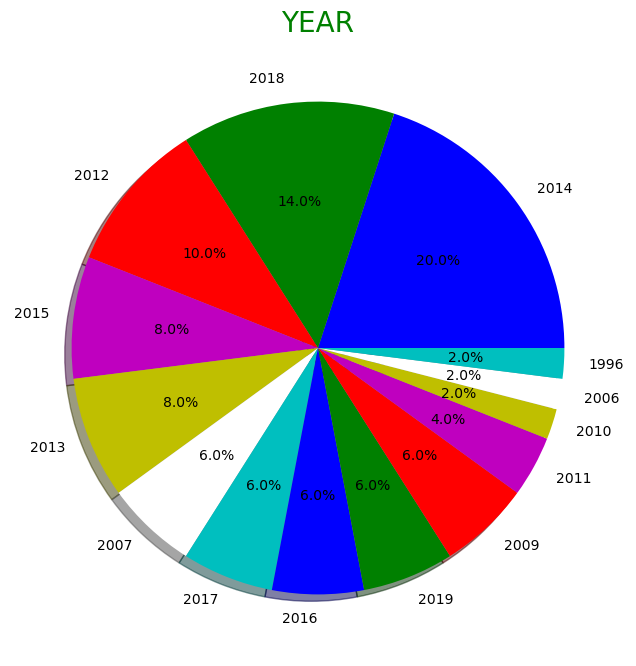

In [28]:
labels = data['year'][:50].value_counts().index
sizes = data['year'][:50].value_counts()
colors = ['b','g','r','m','y','w','c']
plt.figure(figsize = (8,8))
plt.pie(sizes,labels =labels,rotatelabels =False, autopct ='%1.1f%%',colors = colors,shadow = True,startangle = 0)
plt.title("YEAR",color = 'g',fontsize = 20)
plt.show()

In [29]:
data.fuel.value_counts()

Diesel      1800
Petrol      1717
CNG           37
LPG           22
Electric       1
Name: fuel, dtype: int64

<AxesSubplot:xlabel='fuel', ylabel='Count'>

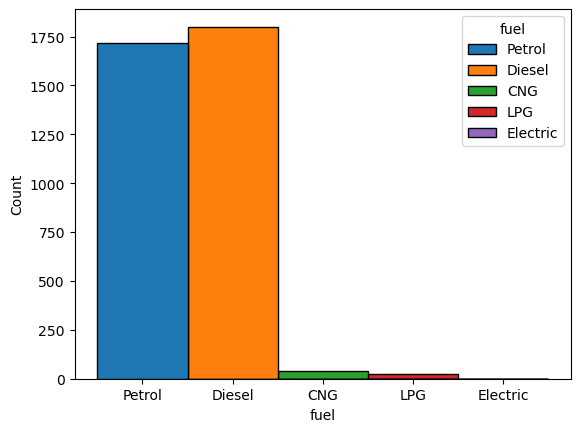

In [30]:
sns.histplot(data =data,x='fuel',hue='fuel',alpha=1)


<AxesSubplot:xlabel='fuel', ylabel='selling_price'>

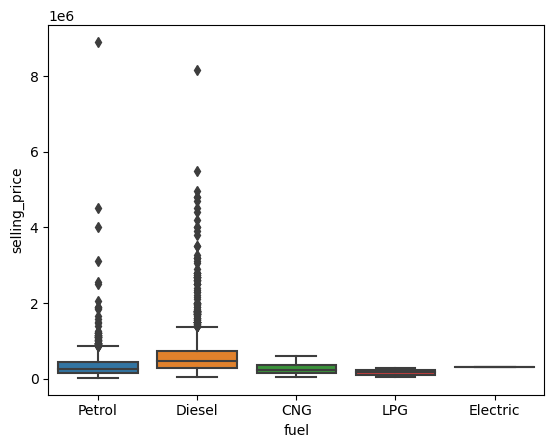

In [31]:
sns.boxplot(x = 'fuel',y='selling_price',data = data)

In [32]:
data.seller_type.value_counts()

Individual          2832
Dealer               712
Trustmark Dealer      33
Name: seller_type, dtype: int64

<AxesSubplot:xlabel='seller_type', ylabel='Count'>

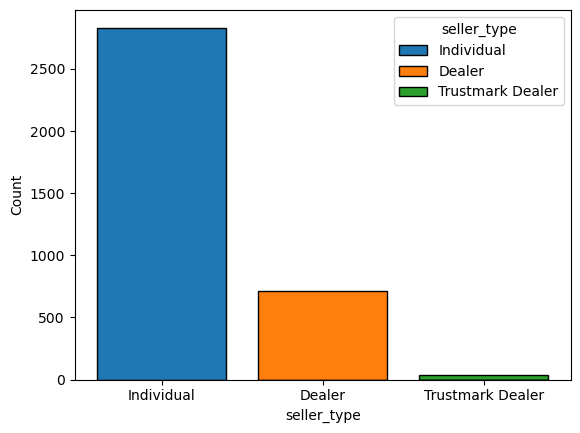

In [33]:
sns.histplot(data=data, x='seller_type', hue='seller_type',shrink=.8,alpha=1,)

<AxesSubplot:xlabel='seller_type', ylabel='selling_price'>

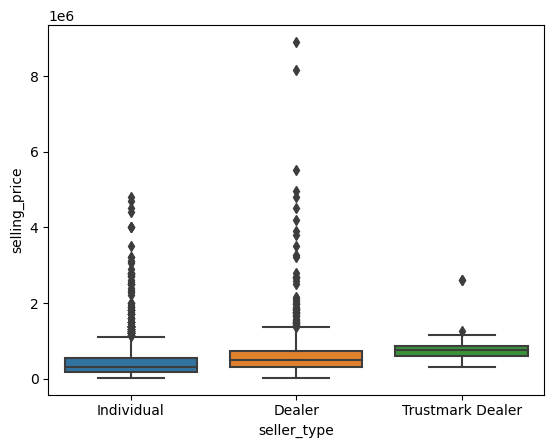

In [34]:
sns.boxplot(x = 'seller_type',y = 'selling_price', data = data)

In [35]:
data.transmission.value_counts()

Manual       3265
Automatic     312
Name: transmission, dtype: int64

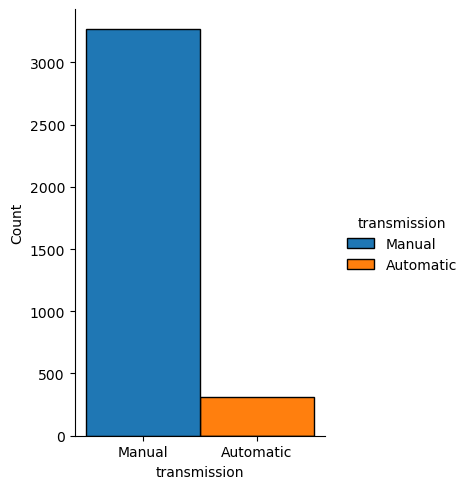

In [36]:
sns.displot(data=data, x ='transmission',hue='transmission',aspect=.7,alpha=1)

<AxesSubplot:xlabel='transmission', ylabel='selling_price'>

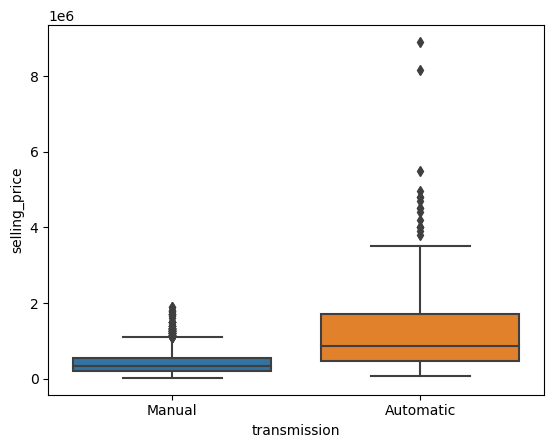

In [37]:
sns.boxplot(x = 'transmission',y = 'selling_price',data = data)

In [38]:
data.owner.value_counts()

First Owner             2218
Second Owner             978
Third Owner              289
Fourth & Above Owner      75
Test Drive Car            17
Name: owner, dtype: int64

([0, 1, 2, 3, 4],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

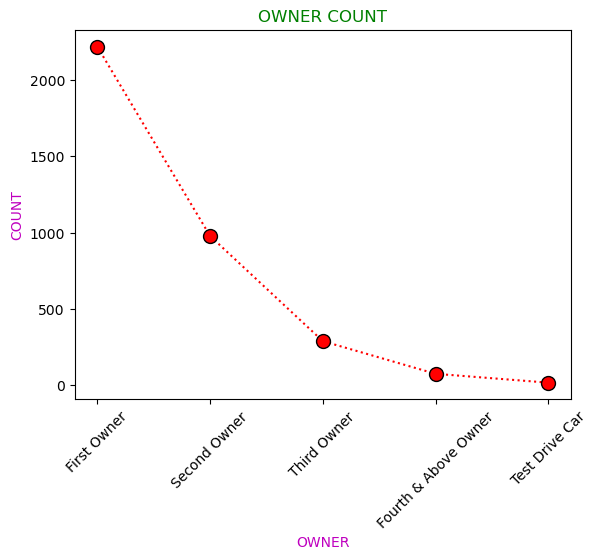

In [39]:
plt.plot(data.owner.value_counts(), 'o:r',ms=10,mec='k')
plt.xlabel("OWNER",fontsize =10,color='m')
plt.ylabel("COUNT",fontsize =10,color='m',)
plt.title("OWNER COUNT",color='g')
plt.xticks(rotation=45)

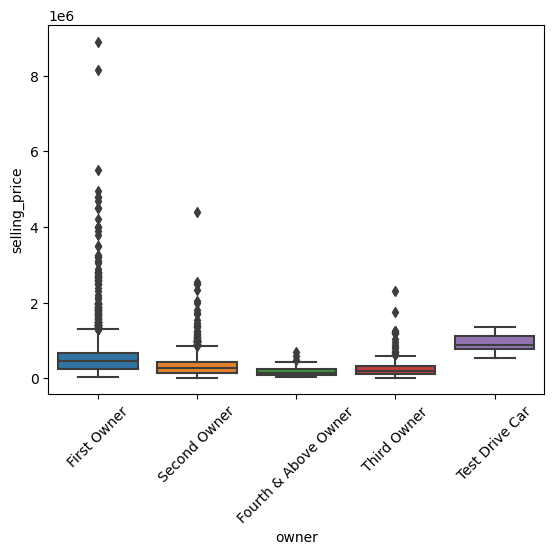

In [40]:
sns.boxplot(x = 'owner',y = 'selling_price',data = data)
plt.xticks(rotation = 45)
plt.show()

# Label Encoding

In [41]:
from sklearn import preprocessing
label = preprocessing.LabelEncoder()
data['name_2'] = label.fit_transform(data['name_2'])
data['name'] = label.fit_transform(data['name'])
data['fuel'] = label.fit_transform(data['fuel'])
data['seller_type'] = label.fit_transform(data['seller_type'])
data['transmission'] = label.fit_transform(data['transmission'])
data['owner'] = label.fit_transform(data['owner'])
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,name_2
0,775,2007,60000,70000,4,1,1,0,18
1,1041,2007,135000,50000,4,1,1,0,18
2,505,2012,600000,100000,1,1,1,0,10
3,118,2017,250000,46000,4,1,1,0,5
4,279,2014,450000,141000,1,1,1,2,9


In [42]:
X =data.drop(columns = 'selling_price')
y= data['selling_price']
standardScaler = StandardScaler()
standardScaler.fit(X)

StandardScaler()

# Multi Linear Regressor

In [43]:
X =data.drop(columns = 'selling_price')
y= data['selling_price']

In [44]:
from sklearn.model_selection import train_test_split


X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,test_size=0.2,random_state = 100)
regressor= LinearRegression()  
regressor.fit(X_train, y_train) 
y_pred= regressor.predict(X_test)
print('Test Score: ', regressor.score(X_test, y_test))  

Test Score:  0.4370394428264125


# Random Forest

In [45]:
from sklearn.model_selection import train_test_split

X =data.drop(columns = 'selling_price')
y= data['selling_price']
train_X,test_X,train_y,test_y = train_test_split(X,y,test_size = 0.2,random_state = 100)
rf = RandomForestRegressor()
rf.fit(train_X,train_y)
print("Test score:" ,rf.score(test_X,test_y))

Test score: 0.6227058004633488


# XGBoost Algorithm

In [46]:
X =data.drop(columns = 'selling_price')
y= data['selling_price']
train_X,test_X,train_y,test_y = train_test_split(X,y,train_size = 0.8,test_size = 0.2,random_state = 100)

In [47]:
xgbr = XGBRegressor()
xgbr.fit(train_X,train_y)
print("Test score:",xgbr.score(test_X,test_y))

Test score: 0.6652375696537394


# Decision Tree Regressor

In [48]:
X =data.drop(columns = 'selling_price')
y= data['selling_price']
train_X,test_X,train_y,test_y = train_test_split(X,y,test_size = 0.2)

In [49]:
tree = DecisionTreeRegressor()
tree.fit(train_X,train_y)
print("Test:",tree.score(test_X,test_y))

Test: 0.519155760630446
